# College Swimming Lineup Game Theory

### Import Packages

In [260]:
import numpy as np
import pandas as pd
import os

#import grahpics packages
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import re
from collections import Counter

plt.style.use('ggplot')

###
# LIST THE INPUT FILES USED!
###

In [261]:
os.getcwd()

'c:\\Users\\mdb025\\Documents\\GitHub\\collegeswimming.com-Data-Analysis'

In [262]:
# Get the swimmer names to numbers
Swimmer_Names_df = pd.read_csv("SwimmerNames.csv",index_col='swimmer_id')
#print(Swimmer_Names_df)

#Swimmer_Names_dict = dict(zip(Swimmer_Names_df.swimmer_id, Swimmer_Names_df.name))
#Swimmer_Names_dict

### Just looking at the raw performances data from which we get the performance data for each swimmer for the two teams

In [263]:
Bucknell_Lehigh_Perf_df = pd.read_csv("Bucknell_Lehigh_Team_Data.csv")

In [264]:
Bucknell_Lehigh_Perf_df = pd.merge(left=Bucknell_Lehigh_Perf_df, right=Swimmer_Names_df[['name']], how= 'left',left_index= True,right_index=True)

In [265]:
Bucknell_Lehigh_Perf_df['event'].unique()

array(['F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y',
       'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y',
       'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B',
       'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C',
       'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A',
       'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D'],
      dtype=object)

### Read in and convert Swimmer Performance Predictions
### These are formatted so that the performance in a relay leg or leadoff is the same for each swimmer (whether in team A, B, C, etc.). For example, it's just the swimmer's best leadoff leg for a relay (FLF50A, FLF50B,...)
#### TO DO: *Read in raw data and do a sanity/viz check and then add the 3X times after we review the input data*
### F = Female
### L = Lead, 1=Freestyle, 2=Backstroke, 3=Breaststroke, 4=Butterfly
### Unless relay than L,2,3,4 are sequence in relay for medley or L,1 for lead off (1) and leg (2-4) swimmers.

### FLFM50A = Female, lead swimmer in 200Y medley realay on A team

In [266]:
# Event Labels Conversion - Don't Currently Use
EventLabelConvertDict = {'F1200Y':'200Y Free', 'F150Y':'50Y Free', 'F1100Y':'100Y Free', 'F4100Y':'100Y Fly', \
        'F2100Y':'100Y Back', 'F2200Y':'200Y Back', 'F1500Y':'500Y Free', 'F5200Y':'200Y IM', 'F3100Y':'100Y Breast', \
        'F4200Y':'200Y Fly','F3200Y':'200Y Breast','F11650Y':'1650Y Free', \
        'FLM50A': '200Y Medley Relay Back A', 'F2M50A': '200Y Medley Relay Breast A', 'F3M50A': '200Y Medley Relay Fly A', 'F4M50A': '200Y Medley Relay Free A',\
        'FLM50B': '200Y Medley Relay Back B', 'F2M50B': '200Y Medley Relay Breast B', 'F3M50B': '200Y Medley Relay Fly B', 'F4M50B': '200Y Medley Relay Free B',\
        'FLM50C': '200Y Medley Relay Back C', 'F2M50C': '200Y Medley Relay Breast C', 'F3M50C': '200Y Medley Relay Fly C', 'F4M50C': '200Y Medley Relay Free C',\
        'FLM50D': '200Y Medley Relay Back D', 'F2M50D': '200Y Medley Relay Breast D', 'F3M50D': '200Y Medley Relay Fly D', 'F4M50D': '200Y Medley Relay Free D',\
        'FLF50A':'200Y Free Relay Lead A','F1F50A':'200Y Free Relay Leg A', \
        'FLF50B':'200Y Free Relay Lead B','F1F50B':'200Y Free Relay Leg B', \
        'FLF50C':'200Y Free Relay Lead C','F1F50C':'200Y Free Relay Leg C', \
        'FLF50D':'200Y Free Relay Lead D','F1F50D':'200Y Free Relay Leg D'}
                
print(EventLabelConvertDict)

EventOrder = ['FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 
        'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', \
        'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', \
        'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', \
        'F11650Y', 'F1200Y', 'F2100Y', 'F3100Y', \
        'F4200Y', 'F150Y', 'F1100Y', 'F2200Y', \
        'F3200Y', 'F1500Y', 'F4100Y', 'F5200Y', \
        'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', \
        'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D']

print(EventOrder)

{'F1200Y': '200Y Free', 'F150Y': '50Y Free', 'F1100Y': '100Y Free', 'F4100Y': '100Y Fly', 'F2100Y': '100Y Back', 'F2200Y': '200Y Back', 'F1500Y': '500Y Free', 'F5200Y': '200Y IM', 'F3100Y': '100Y Breast', 'F4200Y': '200Y Fly', 'F3200Y': '200Y Breast', 'F11650Y': '1650Y Free', 'FLM50A': '200Y Medley Relay Back A', 'F2M50A': '200Y Medley Relay Breast A', 'F3M50A': '200Y Medley Relay Fly A', 'F4M50A': '200Y Medley Relay Free A', 'FLM50B': '200Y Medley Relay Back B', 'F2M50B': '200Y Medley Relay Breast B', 'F3M50B': '200Y Medley Relay Fly B', 'F4M50B': '200Y Medley Relay Free B', 'FLM50C': '200Y Medley Relay Back C', 'F2M50C': '200Y Medley Relay Breast C', 'F3M50C': '200Y Medley Relay Fly C', 'F4M50C': '200Y Medley Relay Free C', 'FLM50D': '200Y Medley Relay Back D', 'F2M50D': '200Y Medley Relay Breast D', 'F3M50D': '200Y Medley Relay Fly D', 'F4M50D': '200Y Medley Relay Free D', 'FLF50A': '200Y Free Relay Lead A', 'F1F50A': '200Y Free Relay Leg A', 'FLF50B': '200Y Free Relay Lead B', 'F1F

In [267]:
# Read in team swimmer-event data
TeamA_Perf_df = pd.read_csv("BucknellPerf.csv")
TeamB_Perf_df = pd.read_csv("LehighPerf.csv")

In [268]:
# Change the index to the unique Swimmer numbers
TeamA_Perf_df.set_index('Swimmer', inplace=True)
TeamB_Perf_df.set_index('Swimmer', inplace=True)

# Reorder the columns based on the order of events in a meet
TeamA_Perf_df = TeamA_Perf_df[EventOrder]
TeamB_Perf_df = TeamB_Perf_df[EventOrder]

In [269]:
# Look at mins/max for outliers, errors, and omissions.
TeamA_Perf_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FLM50A,26.0,72.353077,27.792649,25.38,44.4450,88.890,88.890,88.89
F2M50A,26.0,80.146538,33.023773,29.33,32.6725,101.730,101.730,101.73
F3M50A,26.0,67.229231,27.822515,24.37,28.3650,85.410,85.410,85.41
F4M50A,26.0,35.205769,22.266376,23.17,24.0650,24.850,26.065,79.92
FLM50B,26.0,72.353077,27.792649,25.38,44.4450,88.890,88.890,88.89
F2M50B,26.0,80.146538,33.023773,29.33,32.6725,101.730,101.730,101.73
F3M50B,26.0,67.229231,27.822515,24.37,28.3650,85.410,85.410,85.41
F4M50B,26.0,35.205769,22.266376,23.17,24.0650,24.850,26.065,79.92
FLM50C,26.0,72.353077,27.792649,25.38,44.4450,88.890,88.890,88.89
F2M50C,26.0,80.146538,33.023773,29.33,32.6725,101.730,101.730,101.73


In [270]:
# Look at mins/max for outliers, errors, and omissions.
TeamB_Perf_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FLM50A,28.0,73.265000,26.719794,25.96,73.6750,88.41,88.41,88.41
F2M50A,28.0,80.548571,29.056189,29.84,80.8500,97.02,97.02,97.02
F3M50A,28.0,69.016071,27.420199,24.89,28.4800,86.04,86.04,86.04
F4M50A,28.0,54.394643,30.508765,22.66,23.8775,56.22,84.33,84.33
FLM50B,28.0,73.265000,26.719794,25.96,73.6750,88.41,88.41,88.41
F2M50B,28.0,80.548571,29.056189,29.84,80.8500,97.02,97.02,97.02
F3M50B,28.0,69.016071,27.420199,24.89,28.4800,86.04,86.04,86.04
F4M50B,28.0,54.394643,30.508765,22.66,23.8775,56.22,84.33,84.33
FLM50C,28.0,73.265000,26.719794,25.96,73.6750,88.41,88.41,88.41
F2M50C,28.0,80.548571,29.056189,29.84,80.8500,97.02,97.02,97.02


## Visualize the median time in each event for each swimmer. Heat map.

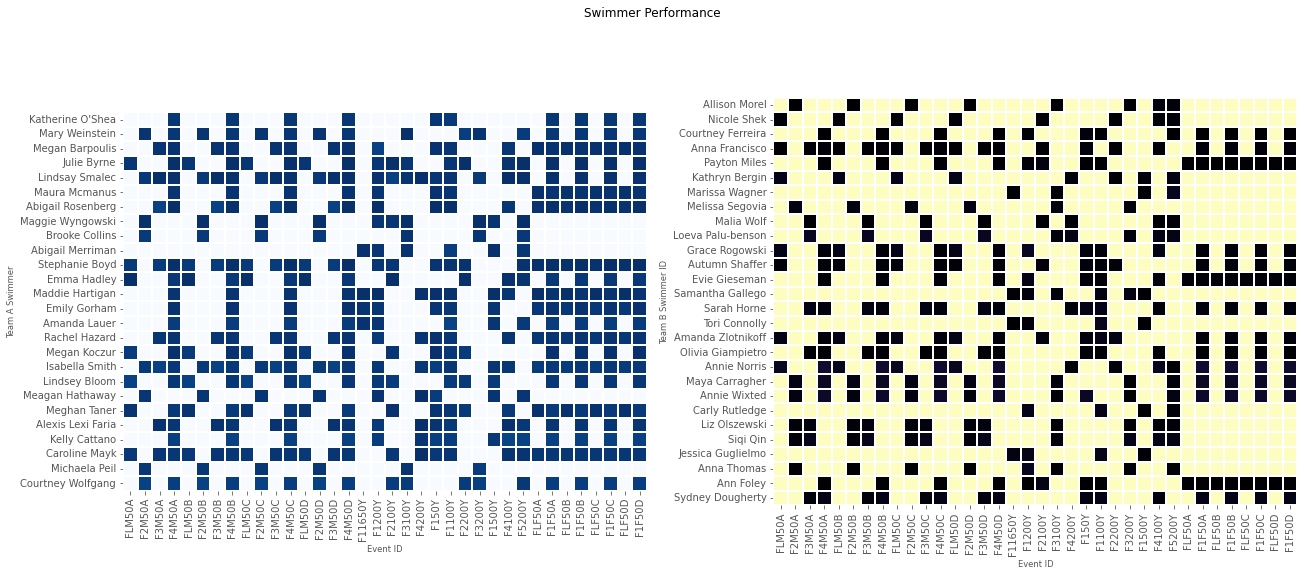

In [271]:
# Displaying performance data frame as a heatmap 
# with diverging colourmap as RdYlGn
fig, axs = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True)

# Make swimmer names the index
TeamA_Perf_Clean_df = pd.merge(left= TeamA_Perf_df, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')
TeamB_Perf_Clean_df = pd.merge(left= TeamB_Perf_df, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')

# Scale the columns to min/max
TeamA_Perf_Clean_df = (TeamA_Perf_Clean_df - TeamA_Perf_Clean_df.min())/(TeamA_Perf_Clean_df.max()-TeamA_Perf_Clean_df.min())
TeamB_Perf_Clean_df = (TeamB_Perf_Clean_df - TeamB_Perf_Clean_df.min())/(TeamB_Perf_Clean_df.max()-TeamB_Perf_Clean_df.min())

sns.heatmap(TeamA_Perf_Clean_df, linewidths = 0.30, annot = False, cbar= False, square= True, ax= axs[0], cmap= 'Blues_r')
sns.heatmap(TeamB_Perf_Clean_df, linewidths = 0.30, annot = False, cbar= False, square= True, ax= axs[1], cmap= 'magma' )

#clean up the charts
fig.suptitle('Swimmer Performance')
axs[0].set_ylabel('Team A Swimmer',fontsize='small')
axs[1].set_ylabel('Team B Swimmer ID',fontsize='small')

axs[0].set_xlabel('Event ID', fontsize='small')
axs[1].set_xlabel('Event ID', fontsize='small')

plt.show()

### Read in initial lineups for both teams and put in a list. We'll create improvedd lineups later.

In [272]:
# Global
TOTAL_LINEUPS = 4

# Initialize lists of lineups for teams A and B
TeamA_Lineup_df = [None] * TOTAL_LINEUPS 
TeamB_Lineup_df = [None] * TOTAL_LINEUPS 

# Read the initial lineups into a list as the first (base) lineup
TeamA_Lineup_df[0] = pd.read_csv("Bucknell_1_Lineup.csv",index_col='Swimmer')
TeamB_Lineup_df[0] = pd.read_csv("Lehigh_1_Lineup.csv",index_col='Swimmer')

#TeamA_Lineup_df = []
#TeamA_Lineup_df.append(pd.read_csv("Bucknell_1_Lineup.csv",index_col='Swimmer'))

#TeamB_Lineup_df = []
#TeamB_Lineup_df.append(pd.read_csv("Lehigh_1_Lineup.csv",index_col='Swimmer'))

# What are the line up events we'll need to assign later?
# We won't really need the D relay team, but keep for consistency
Lineup_Events = tuple(TeamA_Lineup_df[0].columns.tolist())

# Order the colummns to the meet event order
TeamA_Lineup_df[0] = TeamA_Lineup_df[0][EventOrder]
TeamB_Lineup_df[0] = TeamB_Lineup_df[0][EventOrder]

print(Lineup_Events)

('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')


### The base meet did NOT swim a 1650Y Free (F11650Y) or 200Y Free Relay, they swam a 1000Y Free (F11000Y) and 400Y Free Relay instead, make some adjustments to the lineups

In [273]:
# Swimmers were accidentally put in 100Y that actually swam the 1000Y Free from Data Scrape
TeamA_Lineup_df[0].at[260001,'F1100Y'] = 0
TeamA_Lineup_df[0].at[402879,'F1100Y'] = 0

TeamB_Lineup_df[0].at[330114,'F1100Y'] = 0
TeamB_Lineup_df[0].at[696579,'F1100Y'] = 0

In [274]:
# # Add the 1650 Swimmers from the meet that swam the 1000Y Free instead
TeamA_Lineup_df[0].at[330237,'F11650Y'] = 1
TeamA_Lineup_df[0].at[260001,'F11650Y'] = 1
TeamA_Lineup_df[0].at[356813,'F11650Y'] = 1
TeamA_Lineup_df[0].at[330324,'F11650Y'] = 1

TeamB_Lineup_df[0].at[404163,'F11650Y'] = 1
TeamB_Lineup_df[0].at[342505,'F11650Y'] = 1
TeamB_Lineup_df[0].at[271442,'F11650Y'] = 1
TeamB_Lineup_df[0].at[422229,'F11650Y'] = 1

In [275]:
# Add the 200 Free Relay from the 400 Free Relay for TEAM A

TeamA_Lineup_df[0].at[329465,'FLF50A'] = 1
TeamA_Lineup_df[0].at[265562,'F1F50A'] = 1
TeamA_Lineup_df[0].at[233650,'F1F50A'] = 1
TeamA_Lineup_df[0].at[342607,'F1F50A'] = 1

TeamA_Lineup_df[0].at[221480,'FLF50B'] = 1
TeamA_Lineup_df[0].at[342611,'F1F50B'] = 1
TeamA_Lineup_df[0].at[382148,'F1F50B'] = 1
TeamA_Lineup_df[0].at[395502,'F1F50B'] = 1

TeamA_Lineup_df[0].at[260001,'FLF50C'] = 1
TeamA_Lineup_df[0].at[356813,'F1F50C'] = 1
TeamA_Lineup_df[0].at[347298,'F1F50C'] = 1
TeamA_Lineup_df[0].at[344005,'F1F50C'] = 1

In [276]:
# Add the 200 Free Relay from the 400 Free Relay Roster for TEAM B

TeamB_Lineup_df[0].at[494957,'FLF50A'] = 1
TeamB_Lineup_df[0].at[233836,'F1F50A'] = 1
TeamB_Lineup_df[0].at[342918,'F1F50A'] = 1
TeamB_Lineup_df[0].at[213253,'F1F50A'] = 1

TeamB_Lineup_df[0].at[330114,'FLF50B'] = 1
TeamB_Lineup_df[0].at[282290,'F1F50B'] = 1
TeamB_Lineup_df[0].at[323285,'F1F50B'] = 1
TeamB_Lineup_df[0].at[330349,'F1F50B'] = 1

TeamB_Lineup_df[0].at[696579,'FLF50C'] = 1
TeamB_Lineup_df[0].at[273646,'F1F50C'] = 1
TeamB_Lineup_df[0].at[291023,'F1F50C'] = 1
TeamB_Lineup_df[0].at[404163,'F1F50C'] = 1

### EDA on the Base Team Lineups

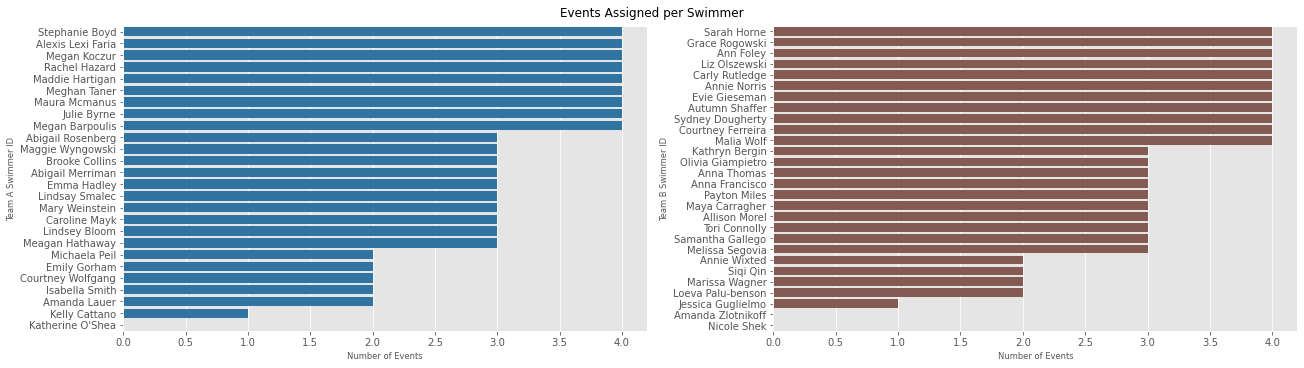

In [277]:
# How many Events for each swimmer?

fig, axs = plt.subplots(1, 2, figsize=(18, 5), constrained_layout=True)

# Team A
TeamA_TotEventsPerAth = TeamA_Lineup_df[0].sum(axis=1).sort_values(ascending=False).to_frame().rename(columns={0: "tot_events"})
TeamA_TotEventsPerAth = pd.merge(left= TeamA_TotEventsPerAth, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True)
sns.barplot(y=TeamA_TotEventsPerAth.name, x=TeamA_TotEventsPerAth.tot_events, color='tab:blue',ax=axs[0])

# Team B
TeamB_TotEventsPerAth = TeamB_Lineup_df[0].sum(axis=1).sort_values(ascending=False).to_frame().rename(columns={0: "tot_events"})
TeamB_TotEventsPerAth = pd.merge(left= TeamB_TotEventsPerAth, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True)
sns.barplot(y=TeamB_TotEventsPerAth.name, x=TeamB_TotEventsPerAth.tot_events, color='tab:brown',ax=axs[1])

#clean up the charts
fig.suptitle('Events Assigned per Swimmer')
axs[0].set_ylabel('Team A Swimmer ID',fontsize='small')
axs[1].set_ylabel('Team B Swimmer ID',fontsize='small')

#for ax in axs:
#    ax.set_ylim([0, 4.2])
axs[0].set_xlabel('Number of Events', fontsize='small')
axs[1].set_xlabel('Number of Events', fontsize='small')
plt.show()



### We can see that some swimmers were put in an as many as four swimming events at this meet. The focus of on our analysis is on assignments that will likely score in the meet. The coach can make adjustments to add athletes they want in events, but likely won't score.

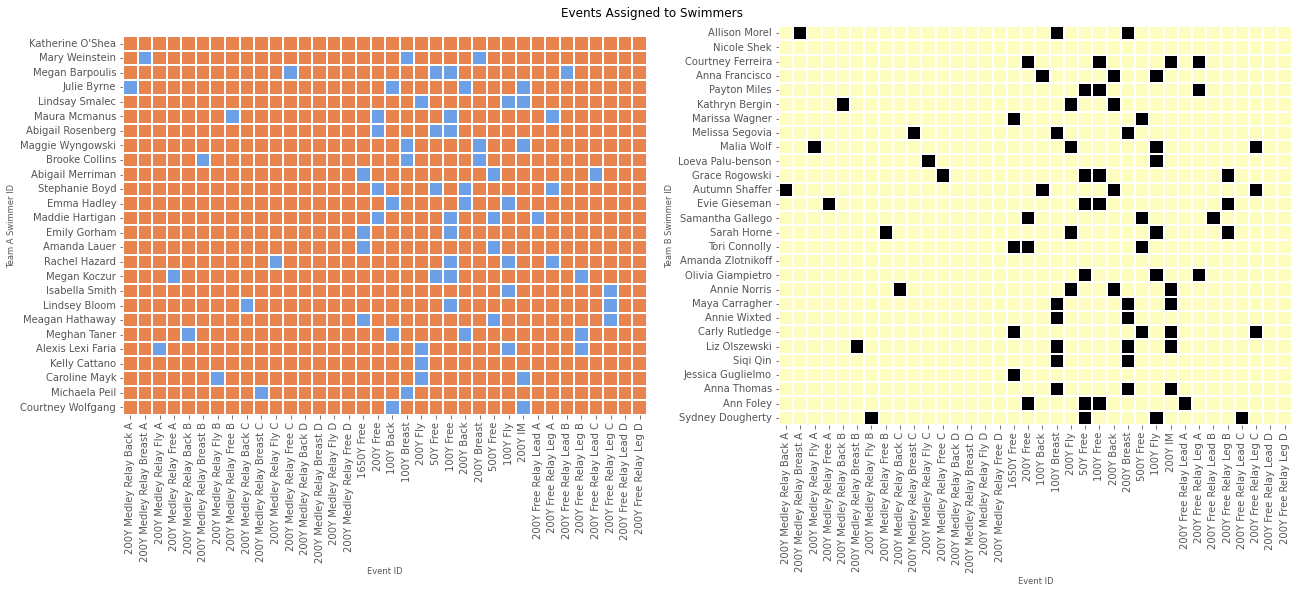

In [278]:
# Displaying dataframe as an heatmap 
# with diverging colourmap as RdYlGn
fig, axs = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True)

# Make swimmer names the index
TeamA_Lineup_Clean_df = pd.merge(left= TeamA_Lineup_df[0], right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')
TeamB_Lineup_Clean_df = pd.merge(left= TeamB_Lineup_df[0], right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')

TeamA_Lineup_Clean_df = TeamA_Lineup_Clean_df.rename(columns=EventLabelConvertDict)
TeamB_Lineup_Clean_df = TeamB_Lineup_Clean_df.rename(columns=EventLabelConvertDict)

sns.heatmap(TeamA_Lineup_Clean_df, linewidths = 0.30, annot = False, cbar= False, square= True, ax= axs[0], cmap= sns.diverging_palette(30, 250, l=65, center="dark", as_cmap=True) )
sns.heatmap(TeamB_Lineup_Clean_df, linewidths = 0.30, annot = False, cbar= False, square= True, ax= axs[1], cmap= 'magma_r' )

#clean up the charts
fig.suptitle('Events Assigned to Swimmers')
axs[0].set_ylabel('Team A Swimmer ID',fontsize='small')
axs[1].set_ylabel('Team B Swimmer ID',fontsize='small')

axs[0].set_xlabel('Event ID', fontsize='small')
axs[1].set_xlabel('Event ID', fontsize='small')

plt.show()

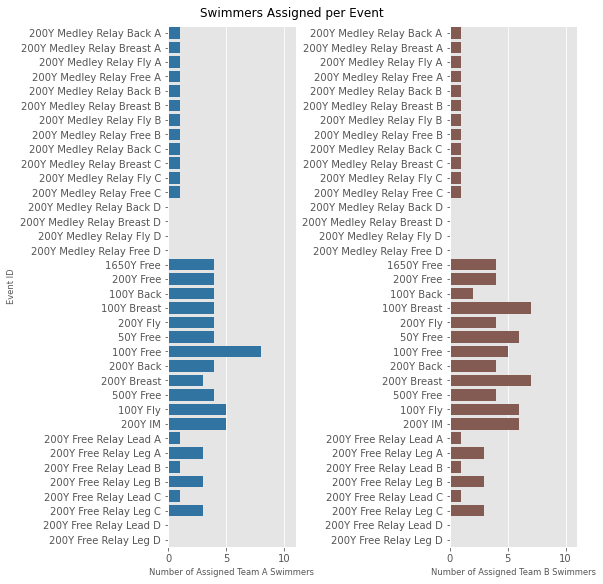

In [279]:
# How many athletes for each event?
fig, axs = plt.subplots(1, 2, figsize=(8, 8), sharey=False, constrained_layout=True)


# Team A
TeamA = TeamA_Lineup_df[0].rename(columns=EventLabelConvertDict).sum(axis=0)
sns.barplot(y=TeamA.index, x=TeamA.values, color='tab:blue',ax=axs[0], ci=None)

#Team B
TeamB = TeamB_Lineup_df[0].rename(columns=EventLabelConvertDict).sum(axis=0)
sns.barplot(y=TeamB.index, x=TeamB.values, color='tab:brown', ax=axs[1], ci=None)

#clean up the charts
fig.suptitle('Swimmers Assigned per Event')
axs[0].set_ylabel('Event ID',fontsize='small')

for ax in axs:
    ax.set_xlim([0, 11])
axs[0].set_xlabel('Number of Assigned Team A Swimmers', fontsize='small')
axs[1].set_xlabel('Number of Assigned Team B Swimmers', fontsize='small')
plt.show()

### Set the scoring rules for the meet

In [280]:
# Point Values for each place in an event category. Format: {# of Lanes: [1st place, 2nd place,... nth place]}
INDIVIDUAL_POINTS = {"Six Lane": [9, 4, 3, 2, 1, 0], "Five Lane": [5, 3, 1, 0]}
RELAY_POINTS = {"Six Lane": [11, 4, 2], "Five Lane": [7, 0]}
# Limit for number of people who can score per team in each event type. Format: {# of Lanes: [Individual, Relay]}
SCORER_LIMIT = {"Six Lane": [3,2], "Five Lane": [2,1]}

### Determine the Expected Score for Team A and Team B when using a given set of performances AND lineups

In [281]:
def calculate_pred_score(perf_team_a, line_team_a, perf_team_b, line_team_b, scoring_method="Six Lane"):
    """
    returns the predicted score of team A for a swimming meet
    :param perf_team_a: Pandas dataframe of predicted performances for a given team A's swimmers
    :param line_team_a: Pandas Dataframe of a given lineup for a team A
    :param perf_team_b: Pandas dataframe of predicted performances for a given team B's swimmers
    :param line_team_b: Pandas Dataframe of a given lineup for a team B
    :param scoring_method: used to determine how points are allocated
    :return: pred_score: Integer value of team A's predicted
    """

    # create predicted performance matrices that only contain values for swimmers in the lineup
    lineup_scores_a = perf_team_a[line_team_a == 1]
    lineup_scores_b = perf_team_b[line_team_b == 1]

    # Team scores are integer values, initialize them at 0
    score_a = score_b = 0

    # Find times for all relay events and put them together in one dictionary
    event_list = lineup_scores_a.columns.tolist()
    # look for relay events. the lookup is performed by finding the leadoff
    r = re.compile(".L[MF].+")  
    relay_list = list(filter(r.match, event_list))
    #print(relay_list)
    relay_event_results = dict()
    for value in relay_list:
        #find out what type of relay value is and make list of legs in relay
        if value[2] == "F":
            # relay is a freestyle relay, so there are two types of legs
            legs = [value, value[:1]+"1"+value[2:]]
        elif value[2] == "M":
            # relay is medley relay, so there are four different legs
            legs = [value, value[:1] + "2" + value[2:], value[:1] + "3" + value[2:], value[:1] + "4" + value[2:]]
        # get sum of legs in relay for full relay time.
        time_a = lineup_scores_a[legs].sum().sum()
        time_b = lineup_scores_b[legs].sum().sum()
        # if event is in dictionary, update data, if not then append it
        if value[2:-1] in relay_event_results:
            if time_a != 0:
                relay_event_results[value[2:-1]][0].append(time_a)
            if time_b != 0:
                relay_event_results[value[2:-1]][1].append(time_b)
        else:
            relay_event_results[value[2:-1]] = [[time_a],[time_b]]
            if time_a == 0:
                relay_event_results[value[2:-1]][0].pop()
            if time_b == 0:
                relay_event_results[value[2:-1]][1].pop()

    # dataframe to keep event scores
    eventScore_df = pd.DataFrame(columns = ['event','team','score'])

    # score the relays
    for event in relay_event_results:
        # get results for each team by event
        results_a = relay_event_results[event][0]
        #print("results for relay event ", event, " are ", results_a)
        results_b = relay_event_results[event][1]
        temp_a, temp_b = score_event(results_a, results_b, RELAY_POINTS[scoring_method], SCORER_LIMIT[scoring_method][1])
        score_a += temp_a
        score_b += temp_b
        eventScore_df = eventScore_df.append({'event' : event, 'team': 'Team A', 'score' : temp_a},ignore_index= True)
        eventScore_df = eventScore_df.append({'event' : event, 'team': 'Team B', 'score' : temp_b},ignore_index= True)
        #print("Event ", event, ":")
        #print("\tBucknell: ",temp_a,", Lehigh: ",temp_b) 
    # score individual events, which we identify in the line below
    individual_events = list(filter(lambda x: x[2] not in "MF", event_list))
    for column_name in individual_events:
        results_a = lineup_scores_a[column_name][lineup_scores_a[column_name].notna()].tolist()
        #print("results for event ", column_name, " are ", results_a)
        results_b = lineup_scores_b[column_name][lineup_scores_b[column_name].notna()].tolist()
        temp_a, temp_b = score_event(results_a, results_b, INDIVIDUAL_POINTS[scoring_method],
                                     SCORER_LIMIT[scoring_method][0])
        # cannot add to two values at same time, so we have to assign points to temp values and then add those to score
        score_a += temp_a
        score_b += temp_b
        #print("Event ", column_name, ":")
        #print("\tBucknell: ",temp_a,", Lehigh: ",temp_b)
        eventScore_df = eventScore_df.append({'event' : column_name, 'team': 'Team A', 'score' : temp_a},ignore_index= True)
        eventScore_df = eventScore_df.append({'event' : column_name, 'team': 'Team B', 'score' : temp_b},ignore_index= True)
    return score_a, score_b, eventScore_df

In [282]:
def score_event(results_a, results_b, places, scoring_limit):
    """
    assigns points to groups based on who has the smallest score/time.
    :param results_a: list of recorded times for team a
    :param results_b: list of recorded times for team b
    :param places: list of point values awarded for first, second, etc place
    :param scoring_limit: the maximum number of swimmers per team that can score in the event
    :return: scores of team a and b
    """
    score_a = score_b = place_counter = 0
    all_times = results_a + results_b  # make a list of all times scored in the event
    all_times.sort()  # sort the list in ascending order
    a_scorers = b_scorers = 0
    results_dict = dict(Counter(all_times))  # convert list to dictionary. key is time, value is frequency of time

    for i in results_dict:
        if place_counter >= len(places):  # When there are no more points to award for the event break the loop
            break

        if results_dict[i] == 1:  # only one instance of the given time in either list (i.e. not a tie)
            if i in results_a:
                if a_scorers <= scoring_limit:
                    score_a = score_a + places[place_counter]
            else:
                if b_scorers <= scoring_limit:
                    score_b = score_b + places[place_counter]

        else:  # this signifies a tie, results_dict[i] > 1
            # split points awarded among all tied players
            points_per_player = sum(places[place_counter: place_counter + results_dict[i]]) / results_dict[i]
            if a_scorers <= scoring_limit:
                score_a += results_a.count(i) * points_per_player
            if b_scorers <= scoring_limit:
                score_b += results_b.count(i) * points_per_player

        a_scorers += results_a.count(i)
        b_scorers += results_b.count(i)
        place_counter = place_counter + results_dict[i]

    return score_a, score_b

### Return Data to project who should win which events based on lineups and predicted performances and show on chart
### 19 total points for indiv and 17 for relay
### 12 indiv and 2 relay = 262 total points

In [283]:
score_A,score_B,eventScore_df = calculate_pred_score(TeamA_Perf_df, TeamA_Lineup_df[0], \
    TeamB_Perf_df, TeamB_Lineup_df[0], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B)

Projected scores: 
Team A:  137.0 
Team B:  125.0


### In the actual 1/26/2019 Team A (Bucknell) won 161-137 (including diving events).
### In just swimming events the actual score was 137-125 as we just predicted.

### Order and names for meet scored events

In [284]:
EventScoreOrder = ['M50', 'F11650Y', 'F1200Y', 'F2100Y', 'F3100Y', \
        'F4200Y', 'F150Y', 'F1100Y', 'F2200Y', \
        'F3200Y', 'F1500Y', 'F4100Y', 'F5200Y', 'F50']

EventScoreLabelConvertDict = {'F1200Y':'200Y Free', 'F150Y':'50Y Free', 'F1100Y':'100Y Free', 'F4100Y':'100Y Fly', \
    'F2100Y':'100Y Back', 'F2200Y':'200Y Back', 'F1500Y':'500Y Free', 'F5200Y':'200Y IM', 'F3100Y':'100Y Breast', \
    'F4200Y':'200Y Fly','F3200Y':'200Y Breast','F11650Y':'1650Y Free', \
    'M50': '200Y Medley Relay', 'F50':'200Y Free Relay'}

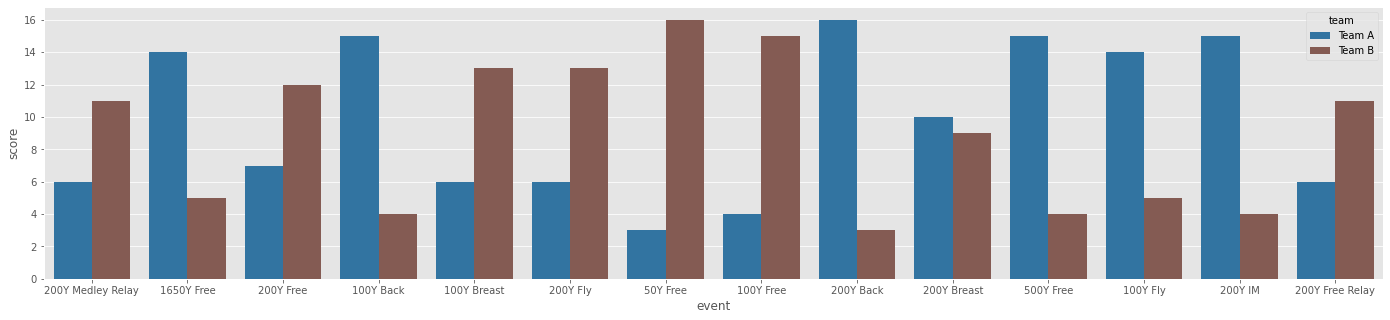

In [285]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(24, 5))

# Set event field as category, reorder to meet order, and rename to user-friendly names
eventScore_df.event = eventScore_df.event.astype('category')
eventScore_df.event = eventScore_df.event.cat.reorder_categories(EventScoreOrder)
eventScore_df.event = eventScore_df.event.cat.rename_categories(EventScoreLabelConvertDict )

sns.barplot(x="event", y="score", hue='team', data=eventScore_df, palette=['tab:blue','tab:brown'], ci=None);

### For a given opponent lineup, generate the top three sorted scores in each event. Then add ghost max scores for places 4, 5
# What should max time and Big_M be for each event?

In [286]:
def create_opptime_dict(perf_team_a, line_team_a):
    """
    MDB function Addition

    returns the predicted opposition times for a given line up (scenario)
    :param perf_team_a: Pandas dataframe of predicted performances for a given team A's swimmers
    :param line_team_a: Pandas Dataframe of a given lineup for a team A
    :return: opptime_team_a: dictionary of team A's top three times in each event
    """
    # create predicted performance matrices that only contain values for swimmers in the lineup
    lineup_scores_a = perf_team_a[line_team_a == 1]

    # Find times for all relay events and put them together in one dictionary
    event_list = lineup_scores_a.columns.tolist()
    # look for relay events. the lookup is performed by finding the leadoff
    r = re.compile(".L[MF].+")  
    relay_list = list(filter(r.match, event_list))
    relay_event_results = dict()
    
    #print(relay_list)

    for value in relay_list:
        #find out what type of relay value is and make list of legs in relay
        if value[2] == "F":
            # relay is a freestyle relay, so there are two types of legs
            legs = [value, value[:1]+"1"+value[2:]]
        elif value[2] == "M":
            # relay is medley relay, so there are four different legs
            legs = [value, value[:1] + "2" + value[2:], value[:1] + "3" + value[2:], value[:1] + "4" + value[2:]]
        # get sum of legs in relay for full relay time.
        time_a = lineup_scores_a[legs].sum().sum()
        # if event is in dictionary, update data, if not then append it
        if value[2:-1] in relay_event_results:
            if time_a != 0:
                relay_event_results[value[2:-1]][0].append(time_a)
        else:
            relay_event_results[value[2:-1]] = [[time_a]]
            if time_a == 0:
                relay_event_results[value[2:-1]][0].pop()

    # create opptime_team_a sorted dictionary of predicted opponent times by event
    # number of places to score the events (likely three for a dual meet) ...SHOULD NOT HARD CODE THIS!
    places = [1, 2, 3, 4, 5]

    opptime_team_a = {}
    for p in places:
        opptime_team_a[p] = {}

    relay_events = list()
    for event in relay_event_results:
        # get results for each team by event
        results_a = relay_event_results[event][0]
        results_a.sort()
        # set the opptime dictionary to sorted time of opp pred times
        for p in places:
            if p <= len(results_a):
                opptime_team_a[p][event] = results_a[p-1]
            else:
                opptime_team_a[p][event] = 4000

        # add the event to the list of events
        relay_events.append(event)


    # score individual events, which we identify in the line below
    individual_events = list(filter(lambda x: x[2] not in "MF", event_list))
    for column_name in individual_events:
        event = column_name
        results_a = lineup_scores_a[event][lineup_scores_a[event].notna()].tolist()
        results_a.sort()
    
        for p in places:
            if p <= len(results_a):
                opptime_team_a[p][event] = results_a[p-1]
            else:
                opptime_team_a[p][event] = 4000
    
    return opptime_team_a

### Get opptime for Team B's lineup(s)

In [287]:
# opponents times needs to be in lineup (or scenario), opponent rank (1,2,3,4), then the name of the scored event
TeamB_lineupNums = 1
opptime_TeamB_dict = dict()
for i in range(TeamB_lineupNums):
    opptime_TeamB_dict[i+1] = create_opptime_dict(TeamB_Perf_df, TeamB_Lineup_df[i])

print(opptime_TeamB_dict[1][3])

{'M50': 113.62, 'F50': 264.81, 'F11650Y': 1099.05, 'F1200Y': 110.35, 'F2100Y': 4000, 'F3100Y': 66.64, 'F4200Y': 125.45, 'F150Y': 23.82, 'F1100Y': 50.51, 'F2200Y': 127.7, 'F3200Y': 143.05, 'F1500Y': 301.34, 'F4100Y': 56.84, 'F5200Y': 126.83}


### OK, now we have performance data for Team A (Bucknell) and opptime prediction for Team B (Lehigh) with the given lineups.
### Compute a (possibly) better lineup for Team A (Bucknell) vs. this lineup

### Get the Pred Performance dictionary with the right column names to match what MeetOpt wants

In [288]:
# Do this for Team_A and then make a new function after getting it to work
# Drop all the peformance columns for B, C, and D relays. They are all identical to the A values
TeamA_Perf_df_MO = TeamA_Perf_df.loc[:,~TeamA_Perf_df.columns.str.endswith(('B','C','D'))]

# List the columns of the predicted performance list
pred_perf_events = TeamA_Perf_df_MO.columns.tolist()
print(pred_perf_events)

['FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'F11650Y', 'F1200Y', 'F2100Y', 'F3100Y', 'F4200Y', 'F150Y', 'F1100Y', 'F2200Y', 'F3200Y', 'F1500Y', 'F4100Y', 'F5200Y', 'FLF50A', 'F1F50A']


In [289]:
# Get list of swimmers from Team A
TeamA_swimmers = TeamA_Perf_df_MO.index.values.tolist()

print(TeamA_swimmers)

[167013, 214963, 221480, 228451, 233487, 233650, 235482, 255871, 256775, 260001, 265562, 270043, 329465, 330237, 330324, 342607, 342611, 344005, 347298, 356813, 382148, 395502, 402879, 403012, 409578, 586800]


In [290]:
# Create the TeamA dictionary in the right structure
# Convert pandas to dict and use Swimmer as row index and Event as columns
TeamA_Perf_dict = TeamA_Perf_df_MO.to_dict(orient='index')
# Show the values
TeamA_Perf_dict[167013]['FLF50A']

79.47

In [291]:
# Get the number of opponent lineups (scenarios) and their associated probabilities
# These will be generated from game theory later

# Need to use this structre for MeetOpt and to allow for more than one scenario later
# for 3 lineups
# opp_lineup_nums = [1,2,3]
# opp_lineup_num = (.1,.5,.4)
opp_lineup_nums = [1]
opp_lineup_select_prob = (1,) 

# connect the lineup nums with their associate probs in a dictionary for MeetOpt
opp_scenario_prob = dict(zip(opp_lineup_nums,opp_lineup_select_prob))

print(opp_scenario_prob)

{1: 1}


In [292]:
# Necessary lists and dicts for MeetOpt
individual_scored_events = ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y','F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y','F4200Y','F3200Y','F11650Y')
relay_scored_events = ('M50','F50')
relay_noMR = ('F50',)
indiv_pastperf_events = individual_scored_events

relay_pastperf_events = ('FLM50A', 'F2M50A','F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
MR_legs = ('FLM50A', 'F2M50A','F3M50A', 'F4M50A')


# the events in opptime for ranking
total_scored_events = individual_scored_events + relay_scored_events

# the events in pred_perf for performance prediction
total_pastperf_events = indiv_pastperf_events + relay_pastperf_events

# Lineup_Events are the events for assignment from the x,y,z variables (1st, 2nd, 3rd) from within MeetOpt

print(total_scored_events)
print(total_pastperf_events)
print(Lineup_Events)

('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')


## Input the MeetOpt function to create an improved lineup vs. an opponent or distribution of opponents.

In [293]:
#from gurobipy import *
#Import PuLP modeller functions
from math import *
import pulp as pl
import time
import os

"""
Created on Sat Jan 12 09:14:40 2019

@author: mdb025
"""

def MeetOpt(athleteFull,scenario,scenprob,indiv_events,relay_scored_events,relaynoMR,stroke,relay_pastperf_events,lineup_events, playperf,opptime):
    """
    :param athletFull: list of athlete IDs
    :param scenario: integer list of the opponent lineups, e.g. [1, 2]
    :param scenprob: dictionary of scenarios to probability (or weight) of selection. This will be the
    the likelihood that the lineup is chosen from a game theory distribution.
    :param indiv_scored_events: a list of the names of the events that are scored in a meet for the individuals
    :param relaynoMR: the list of names of scored freestyle relay events (no medleys)
    :param stroke: the list of names of the legs of the medley relay
    :param relay_scored_events: names of relay events scored and in opptime
    :param lineup_events: the events list that need to be returned for Team A includes relays A,B,C data from xvar, yvar, zvar.
    :param playperf: the dictionary of predicted performances for Team A athletes in each event. indexed by (indiv_scored_events and relay_past_perf_events)
    :param opptime: the dictionary of opposing team ranked performances. Indexed by scenario (lineup), rank (1,2,3,4,5), events (indiv_scored_events and relay_scored_events)
    
    #returns optimal response line up to the given opponent lineup(s) (called scenarios)
    
    """
        
    print("NOW WE'RE IN MEETOPT: \n")


    ## Begin INPUT SETTINGS
    # 1 if want to write output to file at the following path
    # WriteOutput = 0
    # path of the output file adjust for user
    # if WriteOutput == 1:    
    #    path = "G:\My Drive\SwimMeetOpt" + "\SwimMeetOptTrialResults.csv"

    # Used for comparison
    tot_scored_events = indiv_events + relay_scored_events
    tot_pastperf_events = indiv_events + relay_pastperf_events
    tot_assgn_events = lineup_events
    relay = relay_scored_events

    #tuples for dictionaries
    event_noMR = indiv_events + relaynoMR
    print("event_noMR: ", event_noMR)
    print(scenprob)
    print("total SCORED events: ", tot_scored_events)
    print("total PERF events: ", tot_pastperf_events)
    print("total ASSIGNED events:", lineup_events)
    
    homerank = (1,2,3)  
    place = (1,2,3,4,5,6)
    ind_points = (9, 4, 3, 2, 1, 0)
    relay_points = (11,4,2,0,0,0)
    indivplcscore = dict(zip(place,ind_points))
    relayplcscore = dict(zip(place,relay_points)) 

    indiv = indiv_events
    
    #Do these exist in college?
    Maxevent = 4
    Maxrelayevent = 1
    Maxindevent = 3

    TopopprankIndiv = 5
    TopopprankRelay = 3


    #Set solve time limit in seconds and optimality gap
    MaxSolveTime = 10
    SolverTimeLimit = MaxSolveTime*60
    OptGap = 0.01
    #Which Solver?
    SolverUsed = "Gurobi"
    #SolverUsed = "Gurobi"

    if SolverUsed == "CBC":
        #Choose solver, and set it to problem, and build the model
        #Solve with CBC with logging and time limit. Parameter option: keepFiles=1 breaks it!
        #solver = pl.COIN_CMD(msg=1, keepFiles=1, presolve=0, threads=1, maxSeconds=SolverTimeLimit,fracGap = OptGap)
        #solver = pulp.COIN_CMD(msg=1, keepFiles=1, presolve=1, maxSeconds=SolverTimeLimit,fracGap=OptGap)
        pl.PULP_CBC_CMD()
    else:
        #Solve with Gurobi
        #solver = pulp.GUROBI_CMD(keepFiles=1,options=[("MIPFocus",1),("TimeLimit",SolverTimeLimit)])
        #solver = pl.GUROBI_CMD(keepFiles=1,options=[("MIPFocus",1),("MIPGap",OptGap),("TimeLimit",SolverTimeLimit)])
        solver = pl.GUROBI()
        #Solve with Cplex. Throws error for write sol file
        #solver = pulp.CPLEX_scCMD(msg=1,options = ['set mip tolerances mipgap 0.2'])
        #solver = pulp.CPLEX_CMD(msg=1,timelimit=30)


    #highest relative rank for home
    Tophomerank = 3;
    # small constant
    EPS = 0.0001;
    #number of people on a relay team
    relaySize = 4;
    
    #subset of the actual athletes with some 
    #ghosts because of hard relay requirements
    #realathlete are only the actual athletes
    ActAthNum = len(athleteFull)
    athlete = athleteFull[:int(ActAthNum)+4]
    realathlete = athleteFull[:int(ActAthNum)]
    # for i in realathlete:
    #     print("current realathlete index ", realathlete[realathlete.index(i)])
    #     print("previous athlete ", realathlete[realathlete.index(i)-1])

    
    #how big does BigM need to be?
    BigM = dict()
    for e in tot_scored_events:    
        temp = opptime[1][3][e]        
        BigM[e] = 4*temp
        # print("event ", e," big M is ", BigM[e])
    print('Fix Big M') 

    #OUTPUT Arrays and Variables

    #Start the clock for first setup
    setupStart = time.time()
                
    print("Check Done")

    #Instantiate our problem class
    SwimMeetOpt = pl.LpProblem("MeetMax", pl.LpMaximize) 

    #Initialize the decision variables
    #Scenario scores vs. opps
    scenscorevars = {}
    # if assigned athlete has 1st time in event
    xvars = {}
    # if assigned athlete has 2nd best time in event 
    yvars = {}
    # if assigned athlete has 3rd best time in event
    zvars = {}
    # if assigned athlete has 1st time in start time in event 200MR
    xvarleads = {}
    # if assigned athlete has 2nd best time in start time in event 200MR
    yvarleads = {}
    # if assigned athlete has 3rd best time in start time in event 200MR
    zvarleads = {}
    # if assigned athlete has 1st time in medley
    xMRvars = {}
    # if assigned athlete has 2nd best time in medley 
    yMRvars = {}
    # if assigned athlete has 3rd best time in medley
    zMRvars = {}
    # rank of our athletes assigned to events
    rvars = {}
    #indicator variables of for outcome of event j versus opp 1
    wvars = {}
    #assignments
    asgnvars = {}
    
    #OPTIMIZATION DECISION VARIABLES defined in the MeetOpt paper using PuLP:

    #scenscorevar is a placeholder which will hold the expected score of our optimal
    #lineup against the lineup given in scenario i
    scenscorevar = pl.LpVariable.dicts('scenscorevar',(scenario),0,None,pl.LpContinuous)

    #these are placement variables for our athletes to events
    #xvar will hold the best assigned athlete from our team in an event
    #yvar will hold the second best assigned athlete from our team in an event
    #zvar will hold the third best assigned athlete from our team in an event
    #We assume that exactly three athletes are assigned to each event
    #the optimization creates the assignment and the ordering
    xvar = pl.LpVariable.dicts('xvar',(athlete,indiv),0,1,pl.LpBinary)
    yvar = pl.LpVariable.dicts('yvar',(athlete,indiv),0,1,pl.LpBinary)
    zvar = pl.LpVariable.dicts('zvar',(athlete,indiv),0,1,pl.LpBinary)

    
    #Same as above, but the starting leg for the "non-Medley freestyle Relay" relays
    xFRvarlead = pl.LpVariable.dicts('xFRvarlead',(athlete,relaynoMR),0,1,pl.LpBinary)
    yFRvarlead = pl.LpVariable.dicts('yFRvarlead',(athlete,relaynoMR),0,1,pl.LpBinary)
    zFRvarlead = pl.LpVariable.dicts('zFRvarlead',(athlete,relaynoMR),0,1,pl.LpBinary)
    
    #Same ordering as above, but for the athletes assigned to the 
    #best, second best, and third best LEGS of Freestyle relay
    xFRvar = pl.LpVariable.dicts('xFRvar',(athlete, relaynoMR),0,1,pl.LpBinary)
    yFRvar = pl.LpVariable.dicts('yFRvar',(athlete, relaynoMR),0,1,pl.LpBinary)
    zFRvar = pl.LpVariable.dicts('zFRvar',(athlete, relaynoMR),0,1,pl.LpBinary)
    
    #Same ordering as above, but for the athletes assigned to the 
    #best, second best, and third best medley relay
    xMRvar = pl.LpVariable.dicts('xMRvar',(athlete, stroke),0,1,pl.LpBinary)
    yMRvar = pl.LpVariable.dicts('yMRvar',(athlete, stroke),0,1,pl.LpBinary)
    zMRvar = pl.LpVariable.dicts('zMRvar',(athlete, stroke),0,1,pl.LpBinary)

    #rvar will hold the TIME of our first, second, and third fastest entrants in each event
    rvar = pl.LpVariable.dicts('rvar',(homerank,tot_scored_events),None,None,pl.LpContinuous)
    #wvar will be 1 if our athlete with homerank h, in event j, finishes in overall place k, against
    #opponent scenario l
    #with this we can answer in which place our assigned athletes actually finish and score the meet! 
    wvar = pl.LpVariable.dicts('wvar',(tot_scored_events,homerank, place, scenario),0,1,pl.LpBinary)
    #asgnvar is a generic variable which will be 1 if athlete i is assigned to event j (ignoring rank, etc.)
    #just answers the question "Is this athlete doing in this event?"
    #asgnvar = pl.LpVariable.dicts('asgnvar',(athlete,tot_assgn_events),0,1,pl.LpBinary)
    

    #Objective Function - Maximize the weighted scenario (or expected) score against
    #over eact scenario (or against each team)
    SwimMeetOpt += pl.lpSum(scenprob[s]*scenscorevar[s] for s in scenario), "Total Expected Score"
    print("obj done")

    # Multiple relay teams and they cannot sweep so only the top two relay teams are included in the home team score
    # defines the variable scenscorevar (scenario score variable) for each scenario
    for s in scenario:
        SwimMeetOpt += scenscorevar[s] == pl.lpSum(indivplcscore[p]*wvar[j][k][p][s] for j in indiv for k in homerank for p in place if k<=p) + \
            pl.lpSum(relayplcscore[p]*wvar[j][k][p][s] for j in relay_scored_events for k in homerank for p in place if k<=p) + \
            pl.lpSum(2*wvar[j][1][4][s] - 2*wvar[j][3][3][s] for j in relay_scored_events), "Scenario %s Score"%s


    #CREATING THE CONSTRAINTS FOR THE OPTIMIZATION PROBLEM:

    # Exactly one 1st, 2nd, 3rd best time athlete in each indiv event
    for j in indiv:        
        SwimMeetOpt += pl.lpSum(xvar[i][j] for i in athlete)  <= 1, "Exactly one 1st for indiv event %s"%j
        SwimMeetOpt += pl.lpSum(yvar[i][j] for i in athlete)  <= 1, "Exactly one 2nd for indiv event %s"%j
        SwimMeetOpt += pl.lpSum(zvar[i][j] for i in athlete)  <= 1, "Exactly one 3rd for indiv event %s"%j

    # Exactly 4 athletes in a relay for our first, second, and third relays
    # accounting for the opening leg not being a flying start in the non-MR relays
    for j in relaynoMR:
        SwimMeetOpt += pl.lpSum(xFRvar[i][j] for i in athlete) == relaySize-1, "Exactly 3 legs in 1st relay %s"%j
        SwimMeetOpt += pl.lpSum(yFRvar[i][j] for i in athlete) == relaySize-1, "Exactly 3 legs in 2nd relay %s"%j
        SwimMeetOpt += pl.lpSum(zFRvar[i][j] for i in athlete) == relaySize-1, "Exactly 3 legs in 3rd relay %s"%j
        SwimMeetOpt += pl.lpSum(xFRvarlead[i][j] for i in athlete) == 1, "Exactly 1 to start 1st relay %s"%j
        SwimMeetOpt += pl.lpSum(yFRvarlead[i][j] for i in athlete) == 1, "Exactly 1 to start 2nd relay %s"%j
        SwimMeetOpt += pl.lpSum(zFRvarlead[i][j] for i in athlete) == 1, "Exactly 1 to start 3rd relay %s"%j

    # Exactly 4 athletes in the first, second, and third best medley relay
    SwimMeetOpt += pl.lpSum(xMRvar[i][j] for i in athlete for j in stroke) == relaySize, "Exactly 4 in 1st MR"
    SwimMeetOpt += pl.lpSum(yMRvar[i][j] for i in athlete for j in stroke) == relaySize, "Exactly 4 in 2nd MR"
    SwimMeetOpt += pl.lpSum(zMRvar[i][j] for i in athlete for j in stroke) == relaySize, "Exactly 4 in 3rd MR"
    
    # Athletes in at most Maxevent 
    for i in athlete: 
        SwimMeetOpt += pl.lpSum(xvar[i][j] + yvar[i][j] + zvar[i][j] for j in indiv)  + pl.lpSum(xFRvar[i][j] + yFRvar[i][j] + zFRvar[i][j] + xFRvarlead[i][j] + yFRvarlead[i][j] + zFRvarlead[i][j] for j in relaynoMR)+ pl.lpSum(xMRvar[i][j]+yMRvar[i][j]+zMRvar[i][j] for j in stroke) <= Maxevent, "Max events for athlete %s"%i

    # Athletes in at most Maxrelayevent
    for i in athlete:
        SwimMeetOpt += pl.lpSum(xFRvar[i][j] + yFRvar[i][j] + zFRvar[i][j] + xFRvarlead[i][j] + yFRvarlead[i][j] + zFRvarlead[i][j] for j in relaynoMR)+ pl.lpSum(xMRvar[i][j]+yMRvar[i][j]+zMRvar[i][j] for j in stroke) <= Maxrelayevent,"Max Relay events for athlete %s"%i
        # Athletes in at most Maxindivevent
        SwimMeetOpt += pl.lpSum(xvar[i][j] + yvar[i][j] + zvar[i][j] for j in indiv) <= Maxindevent,"Max Indiv events for athlete %s"%i 

        # Back to back event constraints
        #HARD CODED WITH EVENT NAMES AND NEEDS TO BE CHECKED
        '''
        SwimMeetOpt += xvar[i]["100F"] + yvar[i]["100F"] + zvar[i]["100F"] + xvar[i]["500F"] + yvar[i]["500F"] + zvar[i]["500F"]<= 1,"No back to back 100F/500F for athlete %s"%i
        SwimMeetOpt += xvar[i]["200F"] + yvar[i]["200F"] + zvar[i]["200F"] + xvar[i]["200IM"] + yvar[i]["200IM"] + zvar[i]["200IM"]<= 1,"No back to back 200F/200IM for athlete %s"%i
        SwimMeetOpt += xvar[i]["100BS"] + yvar[i]["100BS"] + zvar[i]["100BS"] + xvar[i]["100BR"] + yvar[i]["100BR"] + zvar[i]["100BR"]<= 1,"No back to back 100BS/100BR for athlete %s"%i
        '''

        # Athletes can only be one of the 1st, 2nd, or 3rd ranked atheletes assigned to an event j
        for j in indiv:
            SwimMeetOpt += xvar[i][j] + yvar[i][j] + zvar[i][j] <= 1,"athlete %s can only be one of the 1st, 2nd, or 3rd ranked athletes assigned to an event %s"%(i,j)

    #Athletes can only be 1st, 2nd, or 3rd ranked relay team for each relay j
    for i in athlete:  
        for j in relaynoMR:
            SwimMeetOpt += xFRvar[i][j] + yFRvar[i][j] + zFRvar[i][j] + xFRvarlead[i][j] + yFRvarlead[i][j] + zFRvarlead[i][j] <= 1,"athlete %s can only be one of the 1st, 2nd, or 3rd ranked athletes assigned to a relay event %s"%(i,j)
        
        # Each athlete can only perform one stroke in medley relay
        SwimMeetOpt += pl.lpSum(xMRvar[i][j]+yMRvar[i][j]+zMRvar[i][j] for j in stroke) <= 1, "Athlete %s can only perform one stroke in medley relay"%i
    
        
    #Each stroke on each relay team can only have one athlete assigned
    for j in stroke:
        SwimMeetOpt += pl.lpSum(xMRvar[i][j]for i in athlete) <= 1, "Stroke %s on 1st MR can only have one athlete"%j
        SwimMeetOpt += pl.lpSum(yMRvar[i][j]for i in athlete) <= 1, "Stroke %s on 2nd MR can only have one athlete"%j    
        SwimMeetOpt += pl.lpSum(zMRvar[i][j]for i in athlete) <= 1, "Stroke %s on 3rd MR can only have one athlete"%j
    
    #realized rank of athletes from assignments
    #IF NO RUNNER NEED TO ASSIGN A time larger than the third runner, smaller than the BigM for rank
    for j in indiv: 
        SwimMeetOpt += rvar[1][j] == pl.lpSum(playperf[i][j]*xvar[i][j] for i in athlete) + 0.5*BigM[j] + 1.0 - pl.lpSum(xvar[i][j]*(0.5*BigM[j] + 1) for i in athlete)
        SwimMeetOpt += rvar[2][j] == pl.lpSum(playperf[i][j]*yvar[i][j] for i in athlete) + 0.5*BigM[j] + 2.0 - pl.lpSum(yvar[i][j]*(0.5*BigM[j] + 2) for i in athlete)
        SwimMeetOpt += rvar[3][j] == pl.lpSum(playperf[i][j]*zvar[i][j] for i in athlete) + 0.5*BigM[j] + 3.0 - pl.lpSum(zvar[i][j]*(0.5*BigM[j] + 3) for i in athlete)
    
     # The problem data is written to an .lp file
    #SwimMeetOpt.writeLP("SwimMeetOpt.lp")
    
    #WARNING: Sloppy hard code fix for legacy data structure 
    playperfLeg = dict()
    playperfLead = dict()
    for i in athlete:
        # declare dicts
        playperfLeg[i] = dict()
        playperfLead[i] = dict()
        for j in relaynoMR:
            playperfLeg[i][j] = playperf[i]['F1F50A']
            playperfLead[i][j] = playperf[i]['FLF50A']      
    
    for j in relaynoMR: 
        SwimMeetOpt += rvar[1][j] == pl.lpSum(playperfLeg[i][j]*xFRvar[i][j] + playperfLead[i][j]*xFRvarlead[i][j] for i in athlete) + relaySize*0.5*BigM[j] + relaySize*1.0 - pl.lpSum((xFRvar[i][j]+xFRvarlead[i][j])*(0.5*BigM[j] + 1) for i in athlete)
        SwimMeetOpt += rvar[2][j] == pl.lpSum(playperfLeg[i][j]*yFRvar[i][j] + playperfLead[i][j]*yFRvarlead[i][j] for i in athlete) + relaySize*0.5*BigM[j] + relaySize*2.0 - pl.lpSum((yFRvar[i][j]+yFRvarlead[i][j])*(0.5*BigM[j] + 2) for i in athlete)
        SwimMeetOpt += rvar[3][j] == pl.lpSum(playperfLeg[i][j]*zFRvar[i][j] + playperfLead[i][j]*zFRvarlead[i][j] for i in athlete) + relaySize*0.5*BigM[j] + relaySize*3.0 - pl.lpSum((zFRvar[i][j]+zFRvarlead[i][j])*(0.5*BigM[j] + 3) for i in athlete)

    SwimMeetOpt += rvar[1]["M50"] == pl.lpSum(playperf[i][j]*xMRvar[i][j] for i in athlete for j in stroke) + relaySize*0.5*BigM["M50"] + relaySize*1.0 - pl.lpSum(xMRvar[i][j]*(0.5*BigM["M50"] + 1) for i in athlete for j in stroke)
    SwimMeetOpt += rvar[2]["M50"] == pl.lpSum(playperf[i][j]*yMRvar[i][j] for i in athlete for j in stroke) + relaySize*0.5*BigM["M50"] + relaySize*2.0 - pl.lpSum(yMRvar[i][j]*(0.5*BigM["M50"] + 2) for i in athlete for j in stroke)
    SwimMeetOpt += rvar[3]["M50"] == pl.lpSum(playperf[i][j]*zMRvar[i][j] for i in athlete for j in stroke) + relaySize*0.5*BigM["M50"] + relaySize*3.0 - pl.lpSum(zMRvar[i][j]*(0.5*BigM["M50"] + 2) for i in athlete for j in stroke)

    #force consistency in rank order
    for k in homerank:
        for j in tot_scored_events:
            if k < Tophomerank:
                SwimMeetOpt += rvar[k][j] <= rvar[k+1][j]

    #runner/team of rank k can be place in at most one place (1st, 2nd, or 3rd) vs opp 1
    for j in indiv:
        for k in homerank:
            for s in scenario:
                SwimMeetOpt += pl.lpSum(wvar[j][k][l][s] for l in place if l >= k) <= 1 
    for j in relay:
        for k in homerank:
            for s in scenario:        
                SwimMeetOpt += pl.lpSum(wvar[j][k][l][s] for l in place if l >= k) <= 1

    #Did your first runner 1st runner 1st, 2nd in 2nd or 3rd in third vs opp 
    for j in indiv:
        for k in homerank: 
            for l in place: 
                for s in scenario:
                    if k==l: 
                        #print("ath: ",j,"homerank: ",k,"place: ",l, "scen: ",s)
                        SwimMeetOpt += rvar[k][j] <= opptime[s][1][j]*wvar[j][k][l][s] + BigM[j] - BigM[j]*wvar[j][k][l][s]
                    if l>k and l<(TopopprankIndiv + k):
                        #print("ath: ",j,"homerank: ",k,"place: ",l, "scen: ",s, "l-k+1: ", l-k+1) 
                        SwimMeetOpt += rvar[k][j] <= opptime[s][l-k+1][j]*wvar[j][k][l][s] + BigM[j] - BigM[j]*wvar[j][k][l][s]
                    if l>k  and l<=(TopopprankIndiv + k):
                        #print("ath: ",j,"homerank: ",k,"place: ",l, "scen: ",s, "l-k: ", l-k) 
                        SwimMeetOpt += rvar[k][j] >= opptime[s][l-k][j]*wvar[j][k][l][s]

    #Did your first relay 1st runner 1st, 2nd in 2nd or 3rd in third vs opp
    for j in relay: 
        for k in homerank:
            for l in place:
                for s in scenario: 
                    if k==l: 
                        SwimMeetOpt += rvar[k][j] <= opptime[s][1][j]*wvar[j][k][l][s] + 5*BigM[j]- 5*BigM[j]*wvar[j][k][l][s]
                    if l>k and l< (TopopprankRelay + k):
                        SwimMeetOpt += rvar[k][j] <= opptime[s][l-k+1][j]*wvar[j][k][l][s] + 5*BigM[j]- 5*BigM[j]*wvar[j][k][l][s]
                    if l>k  and l<=(TopopprankRelay + k):
                        SwimMeetOpt += rvar[k][j] >= opptime[s][l-k][j]*wvar[j][k][l][s]


    #Report the total setup time
    setupStop = time.time()
    print("Total Setup Time = ", int(setupStop - setupStart), " secs")

    # The problem data is written to an .lp file
    SwimMeetOpt.writeLP("SwimMeetOpt.lp")

    SwimMeetOpt.setSolver(solver)

    #Solve the WHOLE problem with selected Solver and report it to Excel
    print("Solve the baseline problem:")
    solveStart = time.time()
    SwimMeetOpt.solve()
    solveStop = time.time()
    print(" Total Solve Time = ", int((solveStop - solveStart)/60.0), " mins")

    #The status of the solution is printed to the screen
    print(" Status:", pl.LpStatus[SwimMeetOpt.status])
    print(" Objective:", pl.value(SwimMeetOpt.objective), " points")

    #Return the objective function value for the best feasible soln found
    BestObjective = pl.lpSum(scenprob[s]*scenscorevar[s].varValue for s in scenario)
    print(" Best Found Solution Objective= ", BestObjective)

    OptObj = pl.value(SwimMeetOpt.objective)
    scenscore = dict()
    for s in scenario:
        scenscore[s] = scenscorevar[s].varValue
        print(" Score under Scenario ",s, "is ", int(scenscorevar[s].varValue))


    # Each of the variables is printed with it's resolved optimum value
    
    optLineup = {}
    for i in athlete:
        optLineup[i] = {}
        for j in indiv:
            optLineup[i][j] = xvar[i][j].varValue + yvar[i][j].varValue + zvar[i][j].varValue
        # TO DO!! Add code for other relays
        optLineup[i]['FLF50A'] = xFRvarlead[i]['F50'].varValue
        optLineup[i]['F1F50A'] = xFRvar[i]['F50'].varValue
        optLineup[i]['FLF50B'] = yFRvarlead[i]['F50'].varValue
        optLineup[i]['F1F50B'] = yFRvar[i]['F50'].varValue 
        optLineup[i]['FLF50C'] = zFRvarlead[i]['F50'].varValue 
        optLineup[i]['F1F50C'] = zFRvar[i]['F50'].varValue
        
        # No need for D teams
        optLineup[i]['FLF50D'] = 0 
        optLineup[i]['F1F50D'] = 0

        for j in stroke: 
            leg = j[:-1]
            optLineup[i][leg+'A'] = xMRvar[i][j].varValue
            optLineup[i][leg+'B'] = yMRvar[i][j].varValue
            optLineup[i][leg+'C'] = zMRvar[i][j].varValue
            
            # No need for D teams
            optLineup[i][leg+'D'] = 0



    #Return the lineup found in form of a 2-D dictionary of assignment for each athlete
    #NEED this to match the events and A/B/C team of relays.
    optlineup_df = pd.DataFrame.from_dict(optLineup)

    # Return the transpose to get swimmers as index
    return optlineup_df.T 

In [294]:
#pl.pulpTestAll()

In [295]:
pl.listSolvers(onlyAvailable=True)

No parameters matching '_test' found


['GLPK_CMD', 'GUROBI', 'GUROBI_CMD']

### Create the new lineup for Team A in response to Team B's lineup

In [296]:
# def MeetOpt(athleteFull,scenario,scenprob,indiv_events,relay_scored_events,relaynoMR,stroke,relay_pastperf_events,lineup_events, playperf,opptime):

# Test MeetOpt inputs and outputs
TeamA_Lineup_df[1] = MeetOpt(TeamA_swimmers, opp_lineup_nums, opp_scenario_prob, individual_scored_events, \
    relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamA_Perf_dict,opptime_TeamB_dict)

# Reorder the columns to the meet event order
TeamA_Lineup_df[1] = TeamA_Lineup_df[1][EventOrder]

NOW WE'RE IN MEETOPT: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 1}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Fix Big M
Check Done
obj done
Total Setup Time =  0  secs
Solve the baseline problem:


### EDA on the new Lineup compared to the old

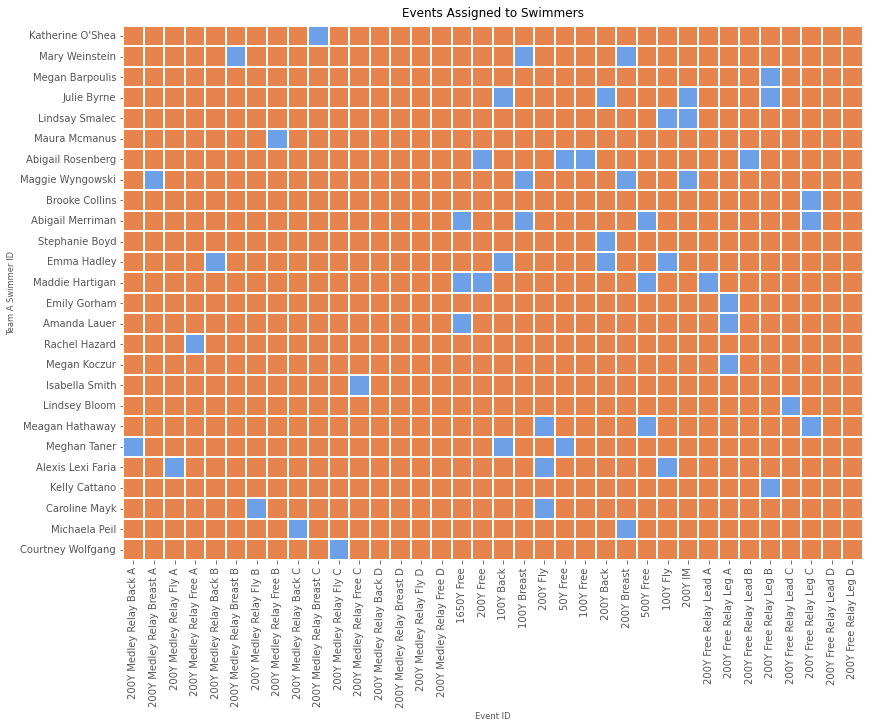

In [297]:
# Check out the "new" lineup
# Displaying dataframe as an heatmap 
# with diverging colourmap as RdYlGn
fig, axs = plt.subplots(1, 1, figsize=(18, 10), constrained_layout=True)

# Make swimmer names the index
TeamA_Lineup_Clean_df = pd.merge(left= TeamA_Lineup_df[1], right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')

TeamA_Lineup_Clean_df = TeamA_Lineup_Clean_df.rename(columns=EventLabelConvertDict)

sns.heatmap(TeamA_Lineup_Clean_df, linewidths = 0.30, annot = False, cbar= False, square= True, ax= axs, cmap= sns.diverging_palette(30, 250, l=65, center="dark", as_cmap=True) )

#clean up the charts
fig.suptitle('Events Assigned to Swimmers')
axs.set_ylabel('Team A Swimmer ID',fontsize='small')

axs.set_xlabel('Event ID', fontsize='small')

plt.show()

### How have the total events per athlete changed?

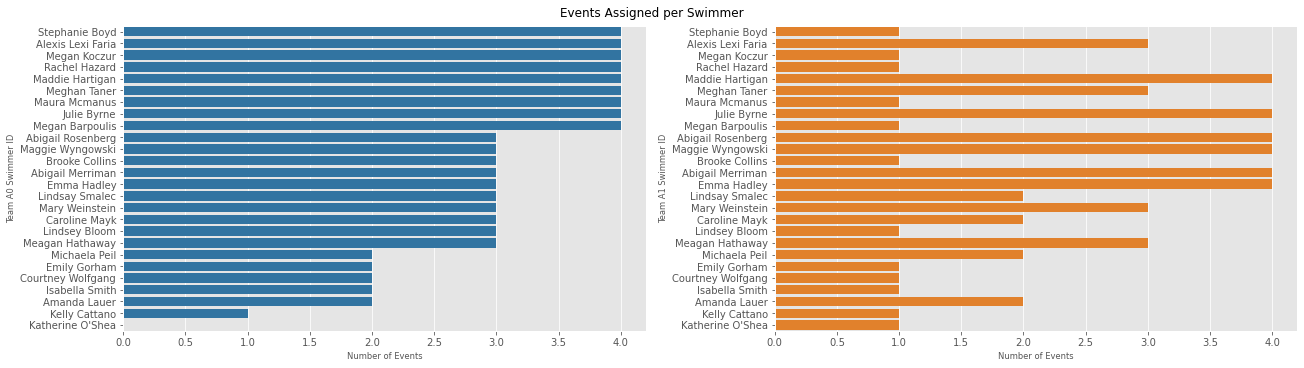

In [298]:
# How many Events for each swimmer?

fig, axs = plt.subplots(1, 2, figsize=(18, 5), constrained_layout=True)

# Team A Lineup 0
TeamA0_TotEventsPerAth = TeamA_Lineup_df[0].sum(axis=1).sort_values(ascending=False).to_frame().rename(columns={0: "tot_events"})
TeamA0_TotEventsPerAth = pd.merge(left= TeamA0_TotEventsPerAth, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True)
sns.barplot(y=TeamA0_TotEventsPerAth.name, x=TeamA0_TotEventsPerAth.tot_events, order=TeamA0_TotEventsPerAth.name,color='tab:blue',ax=axs[0])

# Team A Lineup 1
TeamA1_TotEventsPerAth = TeamA_Lineup_df[1].sum(axis=1).to_frame().rename(columns={0: "tot_events"})
TeamA1_TotEventsPerAth = pd.merge(left= TeamA1_TotEventsPerAth, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True)
sns.barplot(y=TeamA1_TotEventsPerAth.name, x=TeamA1_TotEventsPerAth.tot_events, order=TeamA0_TotEventsPerAth.name, color='tab:orange',ax=axs[1])

#clean up the charts
fig.suptitle('Events Assigned per Swimmer')
axs[0].set_ylabel('Team A0 Swimmer ID',fontsize='small')
axs[1].set_ylabel('Team A1 Swimmer ID',fontsize='small')

#for ax in axs:
#    ax.set_ylim([0, 4.2])
axs[0].set_xlabel('Number of Events', fontsize='small')
axs[1].set_xlabel('Number of Events', fontsize='small')
plt.show()

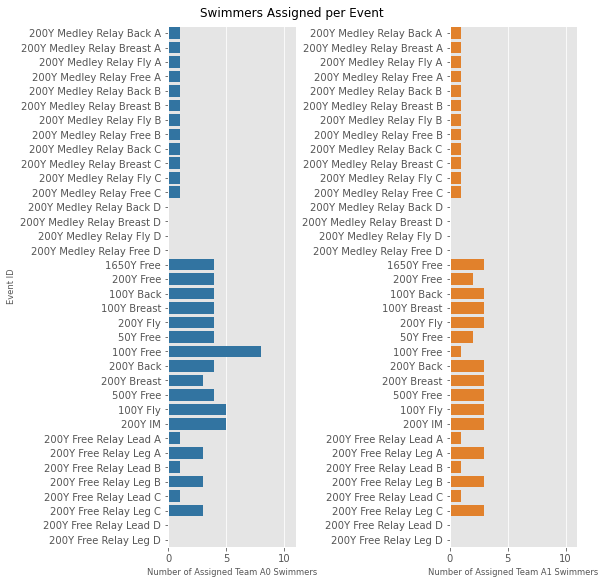

In [299]:
# How many athletes for each event?

fig, axs = plt.subplots(1, 2, figsize=(8, 8), sharey=False, constrained_layout=True)

# Team A old
TeamA = TeamA_Lineup_df[0].rename(columns=EventLabelConvertDict).sum(axis=0)
sns.barplot(y=TeamA.index, x=TeamA.values, color='tab:blue',ax=axs[0], ci=None)

#Team A new
TeamA1 = TeamA_Lineup_df[1].rename(columns=EventLabelConvertDict).sum(axis=0)
sns.barplot(y=TeamA1.index, x=TeamA1.values, color='tab:orange', ax=axs[1], ci=None)

#clean up the charts
fig.suptitle('Swimmers Assigned per Event')
axs[0].set_ylabel('Event ID',fontsize='small')

for ax in axs:
    ax.set_xlim([0, 11])
axs[0].set_xlabel('Number of Assigned Team A0 Swimmers', fontsize='small')
axs[1].set_xlabel('Number of Assigned Team A1 Swimmers', fontsize='small')
plt.show()

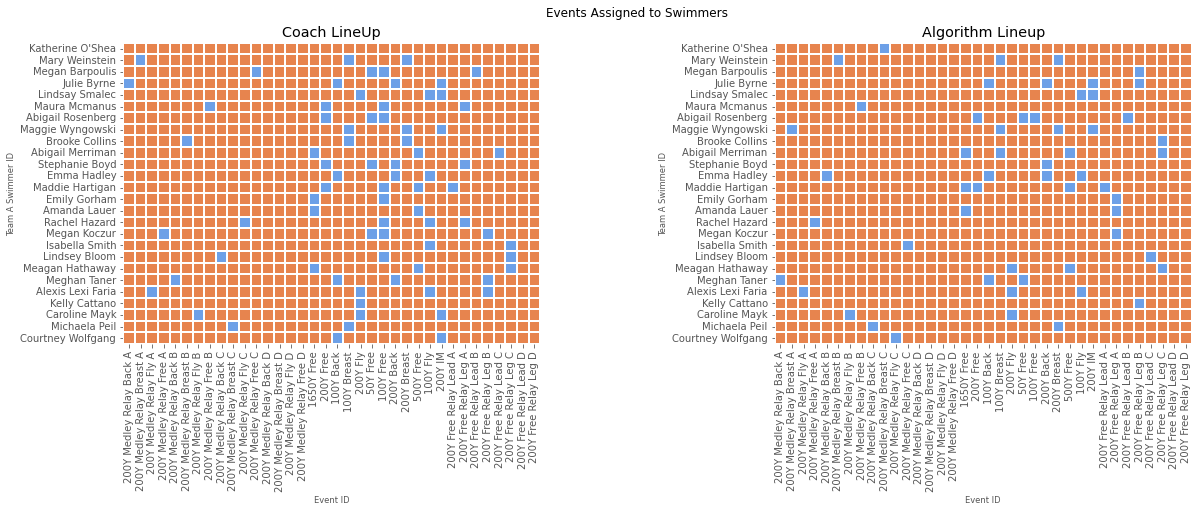

In [300]:
# Displaying dataframe as an heatmap 
fig, axs = plt.subplots(1, 2, figsize=(18, 7), constrained_layout=True)

# Make swimmer names the index
TeamA0_Lineup_Clean_df = pd.merge(left= TeamA_Lineup_df[0], right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')
TeamA1_Lineup_Clean_df = pd.merge(left= TeamA_Lineup_df[1], right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')

TeamA0_Lineup_Clean_df = TeamA0_Lineup_Clean_df.rename(columns=EventLabelConvertDict)
TeamA1_Lineup_Clean_df = TeamA1_Lineup_Clean_df.rename(columns=EventLabelConvertDict)

sns.heatmap(TeamA0_Lineup_Clean_df, linewidths = 0.30, annot = False, cbar= False, square= True, ax= axs[0], cmap= sns.diverging_palette(30, 250, l=65, center="dark", as_cmap=True) )
sns.heatmap(TeamA1_Lineup_Clean_df, linewidths = 0.30, annot = False, cbar= False, square= True, ax= axs[1], cmap= sns.diverging_palette(30, 250, l=65, center="dark", as_cmap=True) )

#clean up the charts
fig.suptitle('Events Assigned to Swimmers')
axs[0].set_ylabel('Team A Swimmer ID',fontsize='small')
axs[1].set_ylabel('Team A Swimmer ID',fontsize='small')

axs[0].set_xlabel('Event ID', fontsize='small')
axs[1].set_xlabel('Event ID', fontsize='small')

axs[0].set_title("Coach LineUp")
axs[1].set_title("Algorithm Lineup")

plt.show()

### Highlight the differences between the two lineups

In [ ]:
TeamA1_Lineup_Clean_df - 

sns.heatmap((TeamA1_Lineup_Clean_df - TeamA1_Lineup_Clean_df), linewidths = 0.30, annot = False, cbar= False, square= True, cmap= sns.diverging_palette(30, 250, l=65, center="dark", as_cmap=True) )

### Score the meet with the new lineup (137 vs 125 predicted for Team A under old lineup).


In [301]:
score_A,score_B,eventScore_df_2 = calculate_pred_score(TeamA_Perf_df, TeamA_Lineup_df[1], \
    TeamB_Perf_df, TeamB_Lineup_df[0], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B)

Projected scores: 
Team A:  146.0 
Team B:  116.0


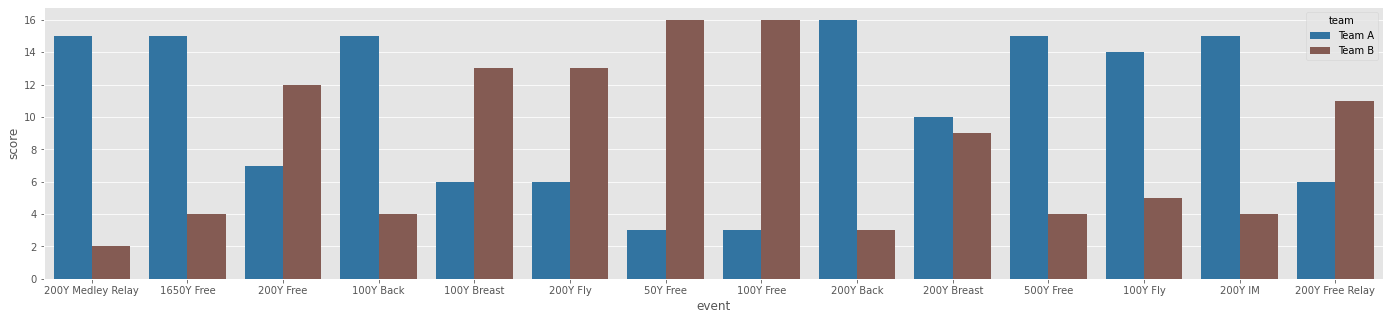

In [302]:
f, ax = plt.subplots(figsize=(24, 5))

# Set event field as category, reorder to meet order, and rename to user-friendly names
eventScore_df_2.event = eventScore_df_2.event.astype('category')
eventScore_df_2.event = eventScore_df_2.event.cat.reorder_categories(EventScoreOrder)
eventScore_df_2.event = eventScore_df_2.event.cat.rename_categories(EventScoreLabelConvertDict )

sns.barplot(x="event", y="score", hue='team', data=eventScore_df_2, palette=['tab:blue','tab:brown'], ci=None);

### So our improved lineup results in a forecasted win by 30 points from the previous lineup's forecasted win by 12 points. What does the algorithm say that Team B should do to lineups 0 (base) and optimized (1)? Assume that the opponents lineup is known

### Team B recommended response to the base lineup (0):

### 1. Get opptime for Team A's Base Lineup

In [303]:
# opponents times needs to be in lineup (or scenario), opponent rank (1,2,3,4), then the name of the scored event
TeamA_lineupNums = 1
opptime_TeamA_dict = dict()
for i in range(TeamA_lineupNums):
    opptime_TeamA_dict[i+1] = create_opptime_dict(TeamA_Perf_df, TeamA_Lineup_df[i])

print(opptime_TeamA_dict[1][3])

{'M50': 111.17999999999999, 'F50': 209.31, 'F11650Y': 1039.34, 'F1200Y': 114.32, 'F2100Y': 55.83, 'F3100Y': 68.42, 'F4200Y': 124.42, 'F150Y': 24.31, 'F1100Y': 53.06, 'F2200Y': 120.98, 'F3200Y': 146.29, 'F1500Y': 299.44, 'F4100Y': 55.75, 'F5200Y': 124.53}


### 2. Find the MeetOpt lineup for the base Team A lineup

In [304]:
# Do this for Team_A and then make a new function after getting it to work
# Drop all the peformance columns for B, C, and D relays. They are all identical to the A values
TeamB_Perf_df_MO = TeamB_Perf_df.loc[:,~TeamB_Perf_df.columns.str.endswith(('B','C','D'))]

# List the columns of the predicted performance list
# TeamB_pred_perf_events = TeamB_Perf_df_MO.columns.tolist()
# print(TeamB_pred_perf_events)

In [305]:
# Get list of swimmer IDs from Team B
TeamB_swimmers = TeamB_Perf_df_MO.index.values.tolist()
print(TeamB_swimmers)

[195456, 197178, 213253, 233796, 233836, 256012, 271442, 271492, 273646, 273907, 282290, 291023, 323285, 330114, 330349, 342505, 342630, 342918, 345696, 377792, 403859, 404163, 405026, 411706, 422229, 432465, 494957, 696579]


In [306]:
# Create the Team B dictionary in the right structure
# Convert pandas to dict and use Swimmer as row index and Event as columns
TeamB_Perf_dict = TeamB_Perf_df_MO.to_dict(orient='index')
# Show the values
TeamB_Perf_dict[197178]['FLF50A']

72.24

In [307]:
# For CONSISTENCY:

# Get the number of opponent lineups (scenarios) and their associated probabilities
# These will be generated from game theory later

# Need to use this structre for MeetOpt and to allow for more than one scenario later
# for 3 lineups
# opp_lineup_nums = [1,2,3]
# opp_lineup_num = (.1,.5,.4)
oppB_lineup_nums = [1]
oppB_lineup_select_prob = (1,) 

# connect the lineup nums with their associate probs in a dictionary for MeetOpt
oppB_scenario_prob = dict(zip(oppB_lineup_nums,oppB_lineup_select_prob))

print(oppB_scenario_prob)

{1: 1}


In [308]:
# def MeetOpt(athleteFull,scenario,scenprob,indiv_events,relay_scored_events,relaynoMR,stroke,relay_pastperf_events,lineup_events, playperf,opptime):

# Find MeetOpt response lineup to the base
TeamB_Lineup_df[1] = MeetOpt(TeamB_swimmers, oppB_lineup_nums, oppB_scenario_prob, individual_scored_events, \
    relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamB_Perf_dict,opptime_TeamA_dict)

# Reorder the columns to the meet event order
TeamB_Lineup_df[1] = TeamB_Lineup_df[1][EventOrder]

NOW WE'RE IN MEETOPT: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 1}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Fix Big M
Check Done
obj done
Total Setup Time =  0  secs
Solve the baseline problem:


### MeetOpt creates a lineup with an expected score of 132 points for Team B vs. the base lineup from Team A. Recall that with Team B's base lineup (vs. Team A's base lineup) we projected (and in reality it matched) a score of 137-125. To account for the tie rules, what is the better prediction from these two lineups?

In [309]:
score_A,score_B,eventScore_df_3 = calculate_pred_score(TeamA_Perf_df, TeamA_Lineup_df[0], \
    TeamB_Perf_df, TeamB_Lineup_df[1], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B)

Projected scores: 
Team A:  130.0 
Team B:  132.0


### What if each team used the MeetOpt lineups vs each other?

In [310]:
score_A,score_B,eventScore_df_4 = calculate_pred_score(TeamA_Perf_df, TeamA_Lineup_df[1], \
    TeamB_Perf_df, TeamB_Lineup_df[1], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B)

Projected scores: 
Team A:  143 
Team B:  118


### GAME THEORY: What if these were the only two lineups they could use? What would be the best response?

### First create a function to solve a game theory matrix

In [344]:
from gurobipy import *

def FindOptStrategy(team, payoffmatrix):
    try:
        # Create variables
        numrows = len(payoffmatrix)    # payoff matrix number of rows
        numcols = len(payoffmatrix[0]) # payoff matrix number of columns
        
        if team == "B":
            # Create a new model
            optModelB = Model("TeamBStrategy")
            optModelB.reset()

            #optModelB.setParam('Presolve',0)

            g = optModelB.addVars(numcols, lb= 0.0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="g")
            u = optModelB.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS,name="u")

            # Set objective
            optModelB.setObjective(u, GRB.MINIMIZE)

            # Add constraint: sumproduct down rows <= bound u.
            optModelB.addConstrs((quicksum(payoffmatrix[i][j]*g[j] for j in range(numcols)) <= u for i in range(numrows)),"bounds")

            # Add constraint: sum of f  = 1, well defined distribution
            optModelB.addConstr(quicksum(g[i] for i in range(numcols)) == 1, "c1")

            optModelB.optimize()
            print (optModelB.display())

            policy, value = printSolution(optModelB)

        elif team == "A":
            # Create a new model
            optModelA = Model("TeamAStrategy")
            optModelA.reset()

            #optModelA.setParam('Presolve',0)

            f = optModelA.addVars(numrows, lb=0.0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="f")
            v = optModelA.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS,name="v")

            # Set objective
            optModelA.setObjective(v, GRB.MAXIMIZE)

            # Add constraint: sumproduct down rows <= bound u.
            optModelA.addConstrs((quicksum(payoffmatrix[i][j]*f[i] for i in range(numrows)) >= v for j in range(numcols)),"bounds")

            # Add constraint: sum of f  = 1, well-defined distribution
            optModelA.addConstr(quicksum(f[i] for i in range(numrows)) == 1, "c2")
        
            optModelA.optimize()
            print (optModelA.display())

            policy, value = printSolution(optModelA)

        return policy, value

    except GurobiError as e:
        print('Error code ' + str(e.errno) + ": " + str(e))

    except AttributeError:
        print('Encountered an attribute error')
        
def printSolution(m):
    answer_dic = {}

    for var in m.getVars():
        print('%s %g' % (var.varName, var.x))
        answer_dic.update({var.varName : var.x})

    print('Obj: %g' % m.objVal)

    #return the variables and their optimal values
    return answer_dic, m.objVal

### Use model to find the optimal strategy for each team

In [346]:
# Create the score matrix with Team
LineupA0vB0 = 12
LineupA0vB1 = -2
LineupA1vB0 = 30
LineupA1vB1 = 25

score_matrix = [[LineupA0vB0 ,LineupA0vB1], [LineupA1vB0,LineupA1vB1]]

#Return the Nash equilibrium mixed strategy and expected points for team A and team B.
f,optB = FindOptStrategy('A', score_matrix)
g,optA = FindOptStrategy('B', score_matrix)

#print('\n Printing f: ',f)
#print('\n Printing optA: ', optA)
#print('\n Printing g: ', g)
#print('\n Printing optB: ',optB)

Discarded solution information
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3 rows, 3 columns and 8 nonzeros
Model fingerprint: 0x7f7a3a3a
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 3 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  2.500000000e+01
Maximize
  <gurobi.LinExpr: v>
Subject To
  bounds[0]: <gurobi.LinExpr: 12.0 f[0] + 30.0 f[1] + -1.0 v> >= 0
  bounds[1]: <gurobi.LinExpr: -2.0 f[0] + 25.0 f[1] + -1.0 v> >= 0
  c2: <gurobi.LinExpr: f[0] + f[1]> = 1
Bounds
  v free
None
f[0] 0
f[1] 1
v 25
Obj: 25
Discarded

### Display the Payoff Matrix for all four lineup pairs

In [332]:
#from tabulate import tabulate
from IPython.display import display, HTML

payoff_df = pd.DataFrame({"Team B LU 0": [LineupA0vB0, LineupA1vB0], "Team B LU 1": [LineupA0vB1, LineupA1vB1]}, index=['Team A LU 0', 'Team A LU 1'])  
display(HTML(payoff_df.to_html())) 
#df.to_latex()

,Team B LU 0,Team B LU 1
Team A LU 0,12,-2
Team A LU 1,30,25


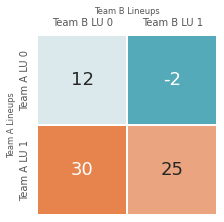

In [353]:
# Displaying dataframe as an heatmap 
fig, axs = plt.subplots(1, 1, figsize=(3, 3), constrained_layout=True)

sns.heatmap(payoff_df, linewidths = 0.3, annot = True, 
            annot_kws={"size": 18},cbar= False, square= True, cmap= sns.diverging_palette(210, 30, l=65, as_cmap=True))


#clean up the charts
#fig.suptitle('Lineup Payoff Matrix')
axs.set_ylabel('Team A Lineups',fontsize='small')
axs.set_xlabel('Team B Lineups', fontsize='small')

axs.xaxis.tick_top()
axs.tick_params(left=False, top=False) ## other options are right and top
axs.xaxis.set_label_position('top') 

plt.show()

## ************************************************************************
## FIX: Need to work out the details on missing values and Big M from Opptime, pred perf, and within MeetOpt.